May: Details about coordinates and bathymetry files using the NEMO configuration of the Salish Sea model as an example.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from IPython.display import Image, display

import scipy.io as sio

%matplotlib inline

"NEMO has the file names of the coordinates and bathymetry files hard-coded as coordinates.nc and bathy_meter.nc so the files used for a particular run-set need to be copied or symlinked to those names."

http://salishsea-meopar-docs.readthedocs.io/en/latest/code-notes/salishsea-nemo/nemo-forcing/repo.html#repo-contents

## Salish Sea Bathymetry File

This section shows the elements that a working bathymetry file contains.

In [2]:
bathy_file = nc.Dataset('/ocean/imachuca/NEMO-forcing/grid/bathy_meter_SalishSea.nc')

In [3]:
bathy_file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    title: Salish Sea NEMO Bathymetry
    institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
    source: https://bitbucket.org/salishsea/tools/src/tip/bathymetry/SalishSeaBathy.ipynb
    references: https://bitbucket.org/salishsea/nemo-forcing/src/tip/grid/bathy_meter_SalishSea.nc
    comment: Based on 1_bathymetry_seagrid_WestCoast.nc file from 2-Oct-2013 WCSD_PREP tarball provided by J-P Paquin.
    history: 
    [2013-10-30 13:18] Created netCDF4 zlib=True dataset.
    [2013-10-30 15:22] Set depths between 0 and 4m to 4m and those >428m to 428m.
    [2013-10-31 17:10] Algorithmic smoothing.
    [2013-11-21 19:53] Reverted to pre-smothing dataset (repo rev 3b301b5b9b6d).
    [2013-11-21 20:14] Updated dataset and variable attributes to CF-1.6 conventions & project standards.
    [2013-11-21 20:47] Removed east end of Jervis Inlet and Toba

In [4]:
bathy_file.dimensions

OrderedDict([('y',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 898),
             ('x',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 398)])

In [5]:
bathy_file.variables

OrderedDict([('nav_lon', <class 'netCDF4._netCDF4.Variable'>
              float64 nav_lon(y, x)
                  units: degrees east
                  valid_range: [-126.40029144 -121.31835175]
                  long_name: Longitude
              unlimited dimensions: 
              current shape = (898, 398)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('nav_lat', <class 'netCDF4._netCDF4.Variable'>
              float64 nav_lat(y, x)
                  units: degrees north
                  valid_range: [ 46.85966492  51.10480118]
                  long_name: Latitude
              unlimited dimensions: 
              current shape = (898, 398)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('Bathymetry', <class 'netCDF4._netCDF4.Variable'>
              float64 Bathymetry(y, x)
                  _FillValue: 0.0
                  least_significant_digit: 1
                  units: m
             

## Salish Sea Coordinates File

This section shows the elements of a working coordinates file.

In [2]:
coord_file = nc.Dataset('/ocean/imachuca/NEMO-forcing/grid/coordinates_seagrid_SalishSea.nc')

In [7]:
coord_file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): x(398), y(898), time(1)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 time(time), int32 time_steps(time), float64 glamt(time,y,x), float64 glamu(time,y,x), float64 glamv(time,y,x), float64 glamf(time,y,x), float64 gphit(time,y,x), float64 gphiu(time,y,x), float64 gphiv(time,y,x), float64 gphif(time,y,x), float64 e1t(time,y,x), float64 e1u(time,y,x), float64 e1v(time,y,x), float64 e1f(time,y,x), float64 e2t(time,y,x), float64 e2u(time,y,x), float64 e2v(time,y,x), float64 e2f(time,y,x)
    groups: 

In [8]:
coord_file.variables

OrderedDict([('nav_lon', <class 'netCDF4._netCDF4.Variable'>
              float32 nav_lon(y, x)
                  units: degrees_east
                  comment: at t points
              unlimited dimensions: 
              current shape = (898, 398)
              filling off), ('nav_lat', <class 'netCDF4._netCDF4.Variable'>
              float32 nav_lat(y, x)
                  units: degrees_north
                  comment: at t points
              unlimited dimensions: 
              current shape = (898, 398)
              filling off), ('time', <class 'netCDF4._netCDF4.Variable'>
              float32 time(time)
                  units: seconds since 0001-01-01 00:00:00
                  time_origin: 0000-JAN-01 00:00:00
                  calendar: gregorian
              unlimited dimensions: time
              current shape = (1,)
              filling off), ('time_steps', <class 'netCDF4._netCDF4.Variable'>
              int32 time_steps(time)
                  units: seconds 

**glam** - longitude and **gphi** - latitude

## Scaling factors

The coordinates file contains not only the longitude and latitude of the grid but also the scaling factors.

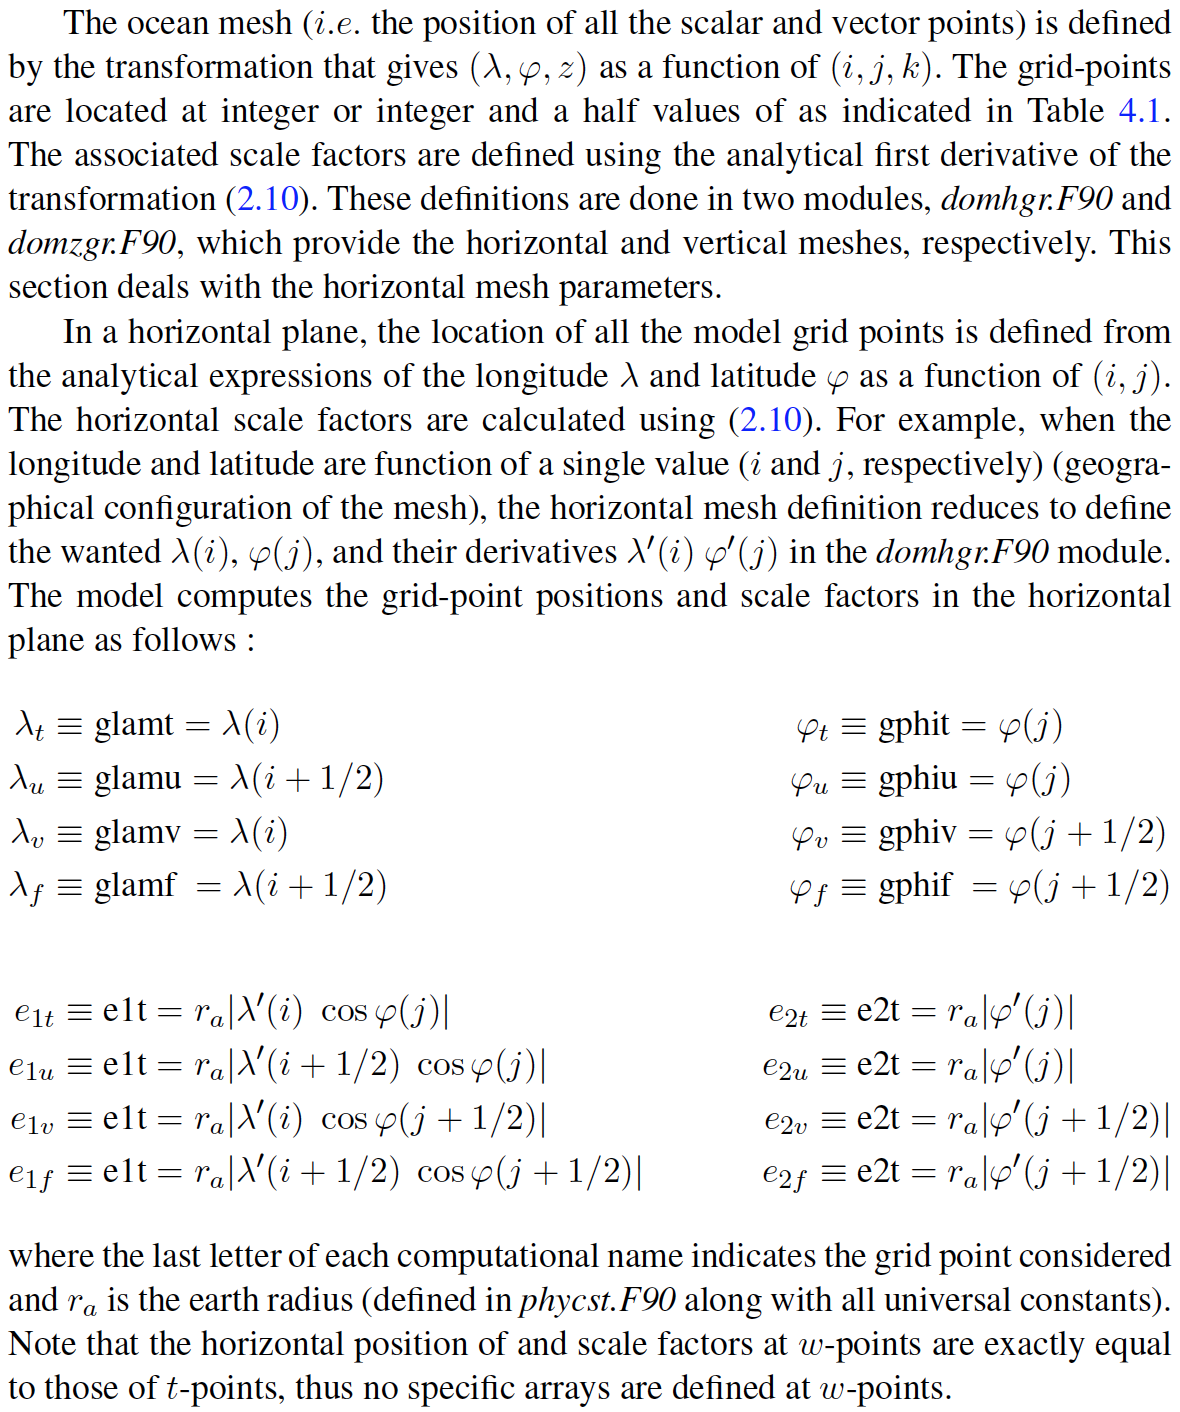

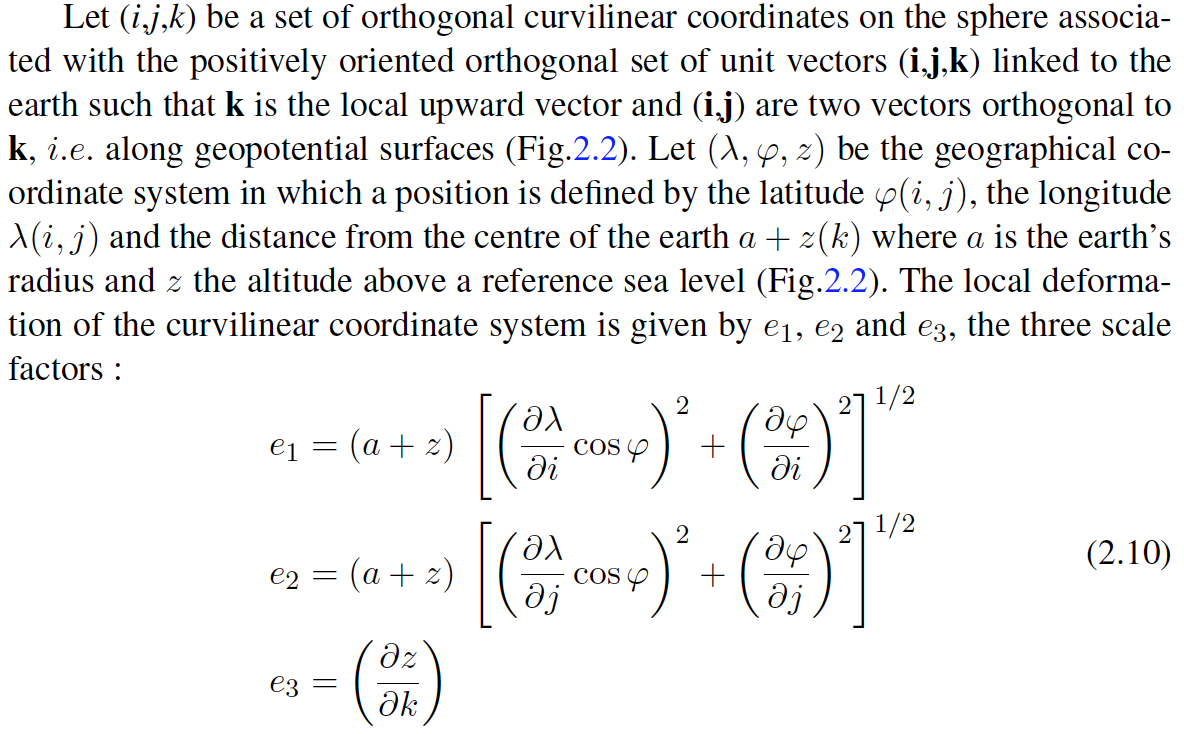

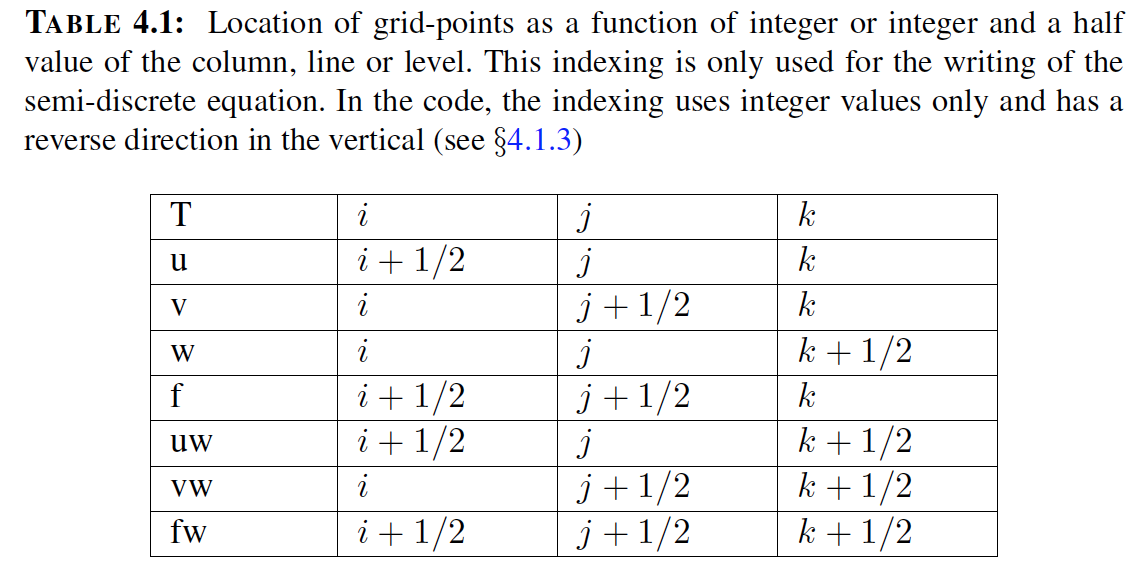

In [17]:
listOfImageNames = ['../../images/coords1.png','../../images/coords2.png','../../images/coords3.png']
# NEMO Ocean Engine by Gurvan Madec and the NEMO team -- pg.54, pg.20, pg.50
for imageName in listOfImageNames:
    display(Image(filename=imageName, width=500))

## Making the Coordinates File

### Overview

* Find the domain's grid coordinates using the **SeaGrid Orthogonal Grid Maker For Matlab** 
        http://woodshole.er.usgs.gov/operations/modeling/seagrid/
        
* All the SeaGrid files have already been downloaded and stored 
        /ocean/dlatorne/MEOPAR/NEMO/NEMO_PREPARATION/1_Seagrid_generator/seagrid
 
* The SeaGrid files for the Salish Sea are found in
        /ocean/dlatorne/MEOPAR/NEMO/NEMO_PREPARATION/1_Seagrid_generator/grid_mat

* Next, the grid coordinates are used to calculate the scaling factors.


* JP compiled the script **compute_grid_and_scaling_factors.m** to calculate the scaling factors
        /ocean/dlatorne/MEOPAR/NEMO/NEMO_PREPARATION/1_Seagrid_generator/scaling_factors
        
* I've modified it, so use this version
        /ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/grid/compute_grid_and_scaling_factors.m

## Using SeaGrid

### Installation and Setup
1. Open MATLAB in the current directory.
2. Add the **.\seagrid**, **.\seagrid\presto** and appropriate **.\seagrid\mex_version_os** directory to your matlab path. Do this by going to *Set Path* and *Add Folder*. I choose *mex_matlab75_linux32*.
3. Test if path works by entering **seagrid version** into the command window.
4. It should say something like Version of 23-Apr-2001 16:26:45.
5. Follow the SeaGrid tutorial in http://woodshole.er.usgs.gov/operations/modeling/seagrid/tutorial.html.

___

### Summary of the Tutorial
1. **seagrid**
2. SeaGrid - Load - **Coastline/Bathymetry File**
3. Define 4 corner points (Starting corner point is defined by  an asterisk)
4. Add any number of edge points (left click and drag to add, right click to remove)
5. View - **Setup** - Okay to increase/decrease number of grid cells (Edge 1 is the first edge counter-clockwise from the starting point)
6. Compute - **Orthogonality** to check grid right angles (colorbar included)
7. View - **Spacers/Spacer Count/Spacer Setup** to modify grid spacing (go back wit View - Control Points)
8. View - Setup - **Projection** for mercator or stereographic and Toggle - Graticule for lon/lat lines
9. SeaGrid - **SaveAs/Revert To Saved** or SeaGrid - Load - **SeaGrid File**
10. Compute - **Land Mask/Depths and Land Mask/Depths/Delete Mask** (and the cells are interactive)
11. The "SeaGrid" file is a Mat-file that contains a "struct" with intuitive fieldnames. It is used by the "seagrid2ecom" and "seagrid2scrum" reformatting programs. Both of those are M-files, which can be used as examples for designing other reformatting routines. *JP based his code on seagrid2roms.m*

*I followed these steps and created a file in the ../grid/ directory called seagrid_amazon.mat*

___

### Details about the Tutorial SeaGrid File
The seagrid output for the tutorial.

```python 
amazon = sio.loadmat('../grid/seagrid_amazon.mat')
```

    {'__globals__': [],
     '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Aug 25 16:18:26 2016',
     '__version__': '1.0',
     's': array([[ (['25-Aug-2016 16:18:26'], ['dosave'], ['Mercator'], [[0, 0, 0]], [], [], ['/ocean/dlatorne/MEOPAR/NEMO/NEMO_PREPARATION/1_Seagrid_generator/seagrid/test_data/amazon_bathy.mat'], ['/ocean/dlatorne/MEOPAR/NEMO/NEMO_PREPARATION/1_Seagrid_generator/seagrid/test_data/amazon_coast.mat']

... numbers


    dtype=[('created_on', 'O'), ('created_by', 'O'), ('projection', 'O'), ('projection_center', 'O'), ('longitude_bounds', 'O'), ('latitude_bounds', 'O'), ('bathymetry', 'O'), ('coastline', 'O'), ('points', 'O'), ('end_slope_flag', 'O'), ('grid_size', 'O'), ('grids', 'O'), ('spacings', 'O'), ('default_spacings', 'O'), ('spaced_edges', 'O'), ('spaced_grids', 'O'), ('geographic_grids', 'O'), ('gridded_bathymetry', 'O'), ('clipping_depths', 'O'), ('bottom', 'O'), ('top', 'O'), ('geometry', 'O'), ('orientation', 'O'), ('mask', 'O'), ('water', 'O'), ('land', 'O')])}

___

### Details about the Salish Sea SeaGrid File
The seagrid output (hopefully) for the salish sea. The file itself was the one entered into the mat file that creates the scaling factors.

    {'__globals__': [],
     '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Tue Jul  9 10:34:52 2013',
     '__version__': '1.0',
     's': array([[ (['09-Jul-2013 10:34:51'], ['dosave'], ['Mercator'], [[0, 0, 0]], [], [], [], ['/home/jlei/jppaquin/1_Seagrid_generator/coastlines/OLD_WC_coastline.mat'], ...

... numbers
    
      dtype=[('created_on', 'O'), ('created_by', 'O'), ('projection', 'O'), ('projection_center', 'O'), ('longitude_bounds', 'O'), ('latitude_bounds', 'O'), ('bathymetry', 'O'), ('coastline', 'O'), ('points', 'O'), ('end_slope_flag', 'O'), ('grid_size', 'O'), ('grids', 'O'), ('spacings', 'O'), ('default_spacings', 'O'), ('spaced_edges', 'O'), ('spaced_grids', 'O'), ('geographic_grids', 'O'), ('gridded_bathymetry', 'O'), ('clipping_depths', 'O'), ('bottom', 'O'), ('top', 'O'), ('geometry', 'O'), ('orientation', 'O'), ('mask', 'O'), ('water', 'O'), ('land', 'O')])}
___

### Setup for Creating the SeaGrid Mackenzie Grid

Once the idealized domain has been found in plot_mackenzie.ipynb using the match_domain function, the stereographic coordinates of the domain corners are found. These will be the four points in the seagrid stereographic window.

1. View - Setup - Stereographic
2. View - Setup - Proj - More - Central longitude 0 and latitude 90 
3. View - Map Units - Kilometers
4. Make 4 corner points
5. View - No Zoom
6. Click and drag anywhere to zoom into a corner and get specific axis values


___



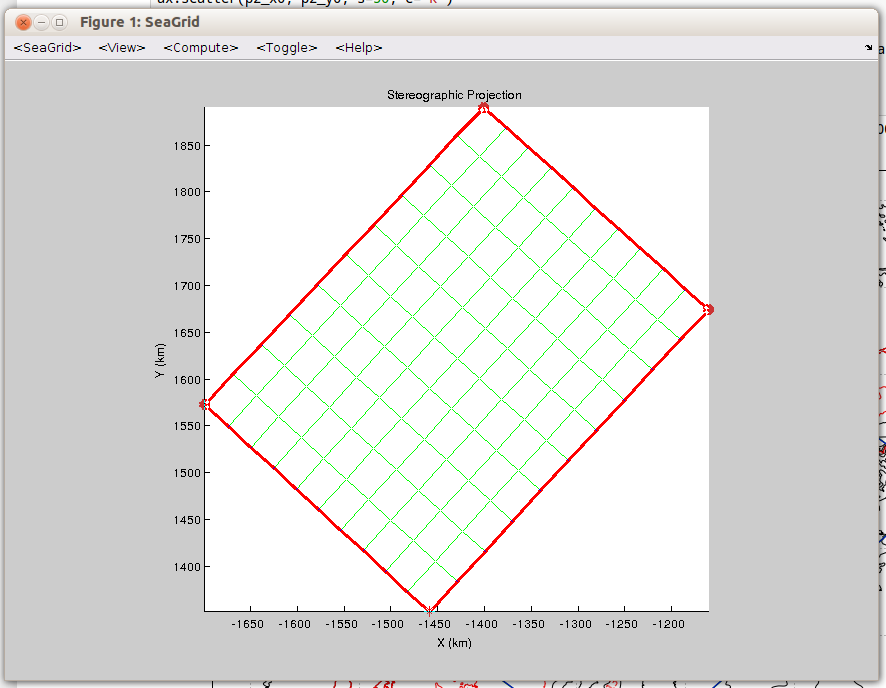

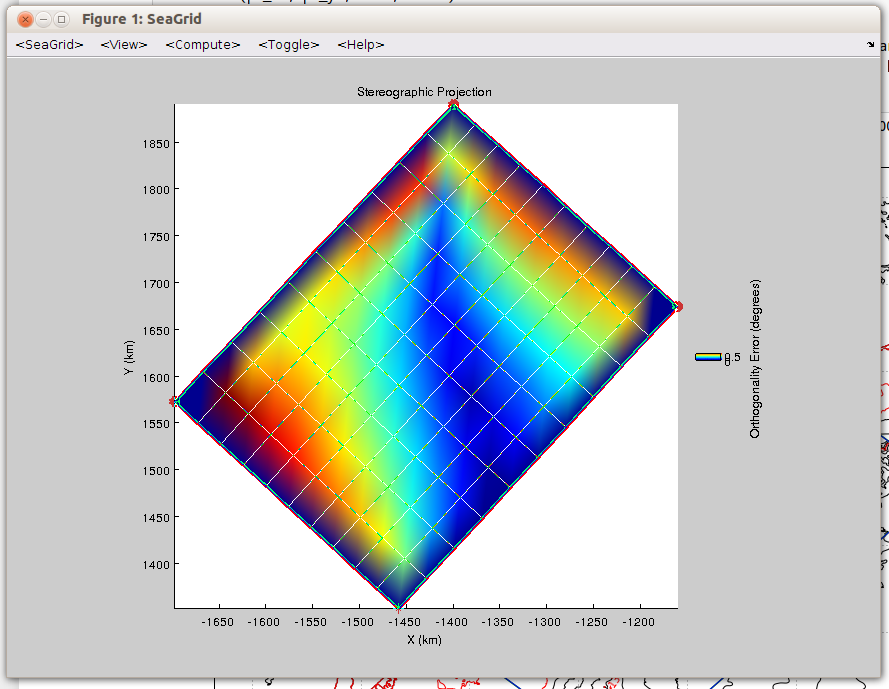

In [19]:
listOfImageNames = ['../../images/im0.png','../../images/im1.png']
for imageName in listOfImageNames:
    display(Image(filename=imageName, width=500))

In [18]:
seagrid_mack = sio.loadmat('../grid/seagrid_mack.mat')
geographic_grids = seagrid_mack['geographic_grids']

amazon = sio.loadmat('../grid/seagrid_amazon.mat')
geographic_grids = amazon['geographic_grids']

seagrid_mack

KeyError: 'dosave'

## Using the Compute Scaling Factors Script

### Initial Modifications
*I copied earthdist.m and compute_grid_and_scaling_factors.m into the ../grid/ directory. Below are the descriptions of the errors encountered when using the code.*

    path_seagrid='/users/staff/jppaquin/NEMO_PREPARATION/1_Seagrid_generator';

    %- Infile
    file_seagrid='grid_mat/seagrid_west_coast_1km_900x400_rot_new.mat';
    %file_seagrid='grid_mat/seagrid_west_coast_100x100_testAnchor.mat';

    %- Outfile
    fileout=([path_seagrid '/scaling_factors/coordinates_seagrid_WestCoast.nc']);
    
    %--- LOAD SEAGRID FILE 
    load([path_seagrid '/' file_seagrid])
    
was changed to a simple 

    fileout=(['test_coordinates_seagrid_WestCoast.nc'])
    load(['seagrid_west_coast_1km_900x400_rot_new.mat'])
___

### Downloaded Packages

    addpath /users/staff/jppaquin/matlab/mexnc
    addpath /users/staff/jppaquin/matlab/netcdf_toolbox/netcdf
    addpath /users/staff/jppaquin/matlab/netcdf_toolbox/netcdf/nctype
    addpath /users/staff/jppaquin/matlab/netcdf_toolbox/netcdf/ncutility
    addpath ../seagrid

*I checked $/.matlab/R2013b and these weren't there. Check if they are readily available and download them. Code runs fine without any of these modules up to the final calculation point before the netcdf file is created.*

    f=netcdf(fileout,'clobber');
    
gives 

    Undefined function 'netcdf' for input arguments of type 'char'.
    
1) I downloaded **mexcdf** with **mexnc** and **snctools** from http://mexcdf.sourceforge.net/downloads/. These files should correspond to MATLAB2013a.

**mexnc**: Add this directory to your MATLAB path, and you are now setup to use mexnc. Check the READMEs for SNCTOOLS for further instructions. Please note that mexnc is NOT the same as the "NetCDF Toolbox", which is something that I did not write and therefore cannot support.
   
**snctools**: SNCTOOLS is a set of MATLAB tools primarily for reading and writing classic model netCDF-3 and netCDF-4 files.

2) Go to https://sourceforge.net/p/mexcdf/svn/48/tree/trunk/netcdf_toolbox/ and click on Download Snapshot. This downloads netcdf toolbox, mexnc, and snctools. These files were uploaded in 2004, so the mexnc files are older than the ones downloaded in (1). Also, there are less functions in this download for mexnc and snctools than in (1).

**netcdf_toolbox**: If you use the NetCDF Toolbox, you will not be able to easily access the help for MATLAB's native netcdf package in R2008b and later.  "help netcdf" will always go to the NetCDF Toolbox, even if it comes last on your path. In order to use the netcdf toolbox, you should add the following paths to your matlab path.

Summary:
I combined the mexnc and snctools from 1) and the netcdf_toolbox from 2) into /grid/mexcdf_all. Note that later, I had to make a change to a netcdf_toolbox function because the code was older (2004) than the matlab version I'm using (2014). No changes had to be made to mexnc (2013).

    addpath /ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/grid/mexcdf_all/mexnc
    addpath /ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/grid/mexcdf_all/netcdf_toolbox/netcdf
    addpath /ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/grid/mexcdf_all/netcdf_toolbox/netcdf/nctype
    addpath /ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/grid/mexcdf_all/netcdf_toolbox/netcdf/ncutility
___

### Error

    Undefined function 'finite' for input arguments of type 'double'.

    Error in ncdim (line 70)
    if ~finite(theDimsize), theDimsize = 0; end
    
subsasgn and ncdim are in @ncdim in netcdf in netcdf_toolbox. This error was fixed by changing finite in ncdim.m to *isfinite* https://www.myroms.org/forum/viewtopic.php?f=17&t=2265.
___

### Error

    Error using subsasgn
    In an assignment  A(:) = B, the number of elements in A and B must be the same.

    Error in compute_grid_and_scaling_factors (line 267)
    f{'nav_lon'}(:) = permute(lons(1:dimx-3,1:dimy-3,1),[2,1]);

Everything except for nav_lon and nav_lat works. This indicates problem with how ncfloat is used (notice that 'time' is also a float). float is float32. double is float64 and int is ncint for time step. mexcdf_2 > netcdf_toolbox > netcdf > nctype.

*The problem was much simpler. A colon and comma fixed it.*

    f{'nav_lon'}(:,:) = permute(lons(1:dimx-3,1:dimy-3,1),[2,1]);
___

### Error

There is no visible error but nothing is being stored in the file.

    <class 'netCDF4._netCDF4.Dataset'>
    root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): 
    variables(dimensions): 
    groups: 
    
Things I tried:
* changing clobber to write - error assigning variable time as unlimited
* changing all file and folder names to netcdf_test and the load package and function called and result = class(theStruct, 'netcdf_test', ncitem(theFilename)) (x2)
* change close(f) to ncsave
* change ncfloat('y','x') to ncfloat(yy,xx)

*I resorted to recoding the part where the nc file is written.*

I took the functions from http://www.mathworks.com/help/matlab/ref/netcdf.html instead of a downloaded netcdf package. The new code has my initials at the beginning, and the old code is commented out. Note that in order to get time-y-x, you have to program it the other way, which makes sense because of the dimensions mentioned in the permute function. Also, there were a few considerations when implementing an unlimited variable. MATLAB always wants it to be the the last dimension and also you have to give it a start, count, and value as a list. This was done for time and time_steps.

___

## Working Code

Now, I test the final modified code.

Salish Sea SeaGrid Output - Salish Sea Compute Scaling Factors Input

    /ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/grid/grid_mat/
    
    seagrid_west_coast_1km_900x400_rot_new.mat
    
    seagrid_west_coast_100x100_testAnchor.mat
    
Salish Sea Compute Scaling Factors Output

    /ocean/dlatorne/MEOPAR/NEMO/NEMO_PREPARATION/1_Seagrid_generator/scaling_factors/
    
    coordinates_seagrid_WestCoast.nc
    
    coordinates_west_coast_testAnchor.nc

IM Coordinates Output File

    /ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/grid/test_coordinates_seagrid_WestCoast.nc
    
### Compute Scaling Factors Script Test
Running seagrid_west_coast_100x100_testAnchor.mat through the matlab script and outputting coordinates_west_coast_testAnchor.nc was compared to test_coordinates_seagrid_WestCoast.nc

In [6]:
coord_IM = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/grid/test_coordinates_seagrid_WestCoast.nc')
coord_IM

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): x(98), y(98), time(1)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 time(time), int32 time_steps(time), float64 glamt(time,y,x), float64 glamu(time,y,x), float64 glamv(time,y,x), float64 glamf(time,y,x), float64 gphit(time,y,x), float64 gphiu(time,y,x), float64 gphiv(time,y,x), float64 gphif(time,y,x), float64 e1t(time,y,x), float64 e1u(time,y,x), float64 e1v(time,y,x), float64 e1f(time,y,x), float64 e2t(time,y,x), float64 e2u(time,y,x), float64 e2v(time,y,x), float64 e2f(time,y,x)
    groups: 

In [7]:
coord_JP = nc.Dataset('/ocean/dlatorne/MEOPAR/NEMO/NEMO_PREPARATION/1_Seagrid_generator/scaling_factors/coordinates_west_coast_testAnchor.nc')
coord_JP

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): x(98), y(98), z(1), time(1)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 time(time), int32 time_steps(time), float64 glamt(time,z,y,x), float64 glamu(time,z,y,x), float64 glamv(time,z,y,x), float64 glamf(time,z,y,x), float64 gphit(time,z,y,x), float64 gphiu(time,z,y,x), float64 gphiv(time,z,y,x), float64 gphif(time,z,y,x), float64 e1t(time,z,y,x), float64 e1u(time,z,y,x), float64 e1v(time,z,y,x), float64 e1f(time,z,y,x), float64 e2t(time,z,y,x), float64 e2u(time,z,y,x), float64 e2v(time,z,y,x), float64 e2f(time,z,y,x)
    groups: 

In [8]:
coord_IM['nav_lon'][:, 0] - coord_JP['nav_lon'][:, 0]

array([ 0.        ,  0.01464844,  0.03007507,  0.04599762,  0.06229401,
        0.07894897,  0.09593964,  0.11327362,  0.13092804,  0.14888763,
        0.16716766,  0.18574524,  0.2046051 ,  0.22374725,  0.24315643,
        0.26281738,  0.28273773,  0.30288696,  0.32326508,  0.34386444,
        0.3646698 ,  0.38566589,  0.40685272,  0.4282074 ,  0.44972992,
        0.47140503,  0.49321747,  0.51515198,  0.53721619,  0.55937195,
        0.58161163,  0.60393524,  0.62631989,  0.64874268,  0.67119598,
        0.69366455,  0.71613312,  0.73859406,  0.76100922,  0.78339386,
        0.80571747,  0.82794952,  0.85010529,  0.87215424,  0.894104  ,
        0.91593933,  0.93767548,  0.95927429,  0.98077393,  1.00214386,
        1.02339172,  1.04451752,  1.06551361,  1.08638   ,  1.10712433,
        1.12773132,  1.14820862,  1.16855621,  1.18876648,  1.20883179,
        1.2287674 ,  1.24856567,  1.26821899,  1.28772736,  1.30709839,
        1.32631683,  1.34539032,  1.36431122,  1.38307953,  1.40